In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("../csv/data_table.csv")
df

,CAB285000006,CAB285000007,CAB285000008,CAB285000009,CAB285000010,CAB285000011,CAB285000012,CAB285000013,CAB285000024,CAB285000025,CAB285000293,CAB285000294,total_average
0,801.373756,766.223602,524.054313,517.604883,545.805233,620.057665,844.626560,658.346076,985.251572,884.105469,795.581538,848.254425,732.607091
1,794.347377,767.520071,507.270295,535.182084,591.183498,736.554994,849.978673,685.343645,1142.417647,1065.478976,735.446920,907.227273,776.495954
2,781.206862,739.062353,558.333333,549.850126,717.368024,817.611940,923.298264,681.746914,1235.628571,1224.918919,895.877583,1008.949881,844.487731
3,805.566434,814.155642,601.888736,696.689170,664.119626,930.070560,938.119867,714.229391,1264.848259,1199.684543,876.707269,1023.608696,877.474016


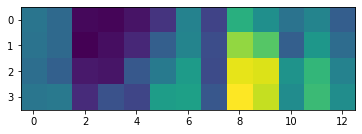

In [3]:
plt.imshow(df)

In [4]:
# 데이터 칼럼,인덱스 이름 변경
df.index = ["Stage1", "Stage2", "Stage3", "Stage4"]
df.columns = ["11(CAB285000006)","11(CAB285000007)","12(CAB285000008)","12(CAB285000009)","13(CAB285000010)","13(CAB285000011)","14(CAB285000012)","14(CAB285000013)","24(CAB285000024)","24(CAB285000025)","81(CAB285000293)","81(CAB285000294)", "STAGE TOTAL AVERAGE"]
df.columns.names = ["bus_num(routeid)"]

## Average of dispatch intervals by time zone

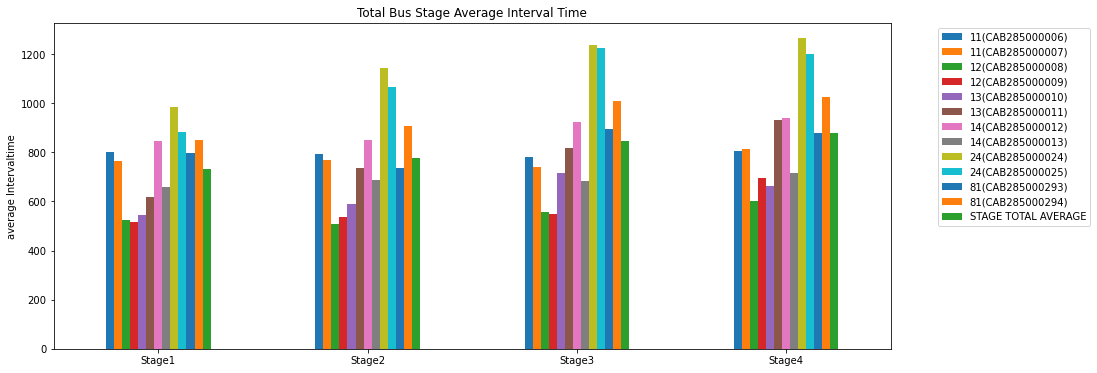

In [5]:
# total
ax = df.plot(kind="bar", title = "Total Bus Stage Average Interval Time",width=0.5,figsize=(15,6))
plt.ylabel("average Intervaltime")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('../image/bus_average_Interval_time_grap_total.png',dpi=200,transparent=True,bbox_inches='tight') # 그래프 이미지로 저장

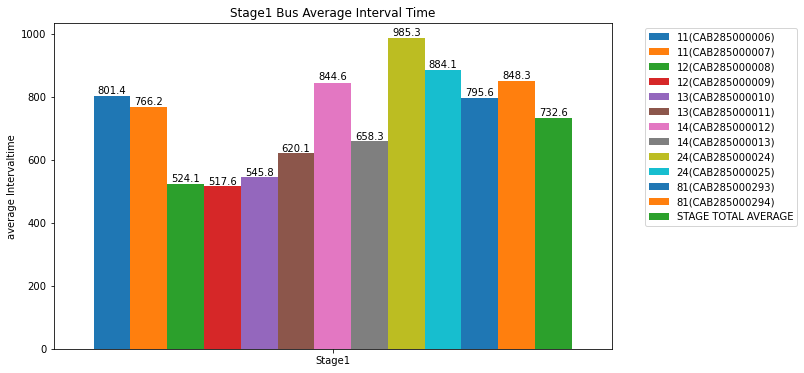

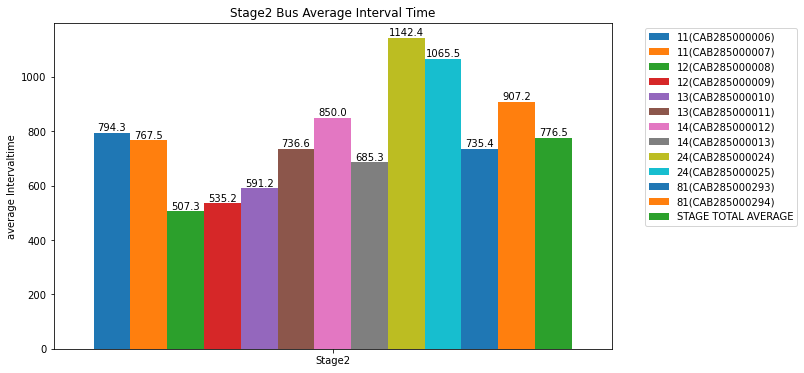

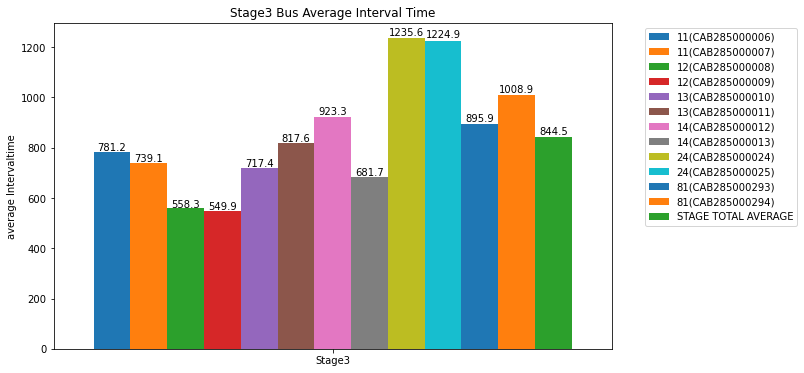

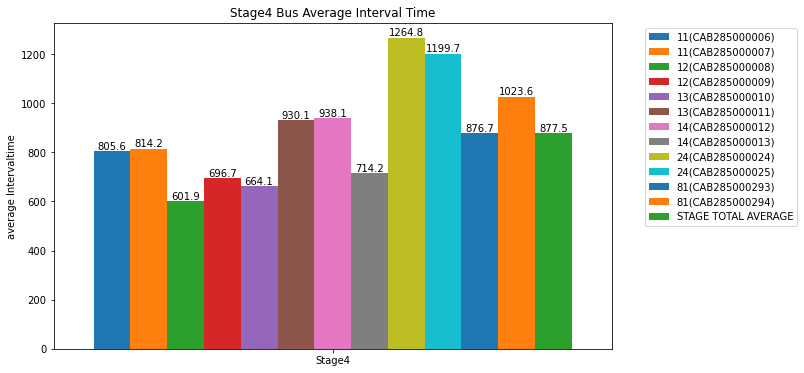

In [6]:
# stages
for stage in df.index:
    #print(stage)
    s = df.loc[[stage],:]
    ax = s.plot(kind="bar", title = stage+" Bus Average Interval Time",width=3.0, figsize=(10,6))
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')

    plt.ylabel("average Intervaltime")
    plt.xticks(rotation=0)

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.savefig('../image/bus_average_Interval_time_grap_'+stage+'.png',dpi=100,transparent=True,bbox_inches='tight')

In [7]:
path =  "../mine"
file_list = os.listdir(path)
print(file_list)

['CAB285000006.csv', 'CAB285000007.csv', 'CAB285000008.csv', 'CAB285000009.csv', 'CAB285000010.csv', 'CAB285000011.csv', 'CAB285000012.csv', 'CAB285000013.csv', 'CAB285000024.csv', 'CAB285000025.csv', 'CAB285000293.csv', 'CAB285000294.csv']


## Comparison of dispatch intervals by bus

In [8]:
route_info = pd.read_csv('../csv/route_info.csv')
interval_times = route_info['intervaltime']

In [9]:
df = df.drop("STAGE TOTAL AVERAGE", axis =1)

In [10]:
time_gap_df = pd.DataFrame(columns=["specified time", "actual Time"])

In [11]:
for i, c in enumerate(df.columns):
    time_gap_df.loc[i] = [interval_times[i], df[c].mean()/60]

time_gap_df.index = ["11(CAB285000006)","11(CAB285000007)","12(CAB285000008)","12(CAB285000009)","13(CAB285000010)","13(CAB285000011)","14(CAB285000012)","14(CAB285000013)","24(CAB285000024)","24(CAB285000025)","81(CAB285000293)","81(CAB285000294)"]
time_gap_df   

,specified time,actual Time
11(CAB285000006),10.0,13.260393
11(CAB285000007),10.0,12.862340
12(CAB285000008),7.0,9.131444
12(CAB285000009),7.0,9.580526
13(CAB285000010),11.0,10.493652
13(CAB285000011),11.0,12.934563
14(CAB285000012),10.0,14.816764
14(CAB285000013),10.0,11.415275
24(CAB285000024),20.0,19.283942
24(CAB285000025),20.0,18.225783


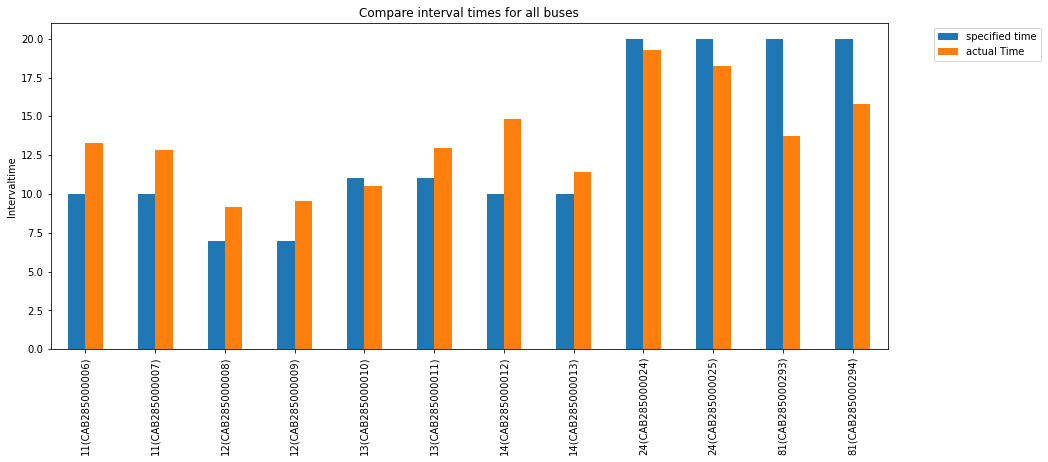

In [12]:
ax = time_gap_df.plot(kind="bar", title = "Compare interval times for all buses",width=0.5,figsize=(15,6))
plt.ylabel("Intervaltime")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('../image/Compare_interval_times_for_all_buses.png',dpi=200,transparent=True,bbox_inches='tight')

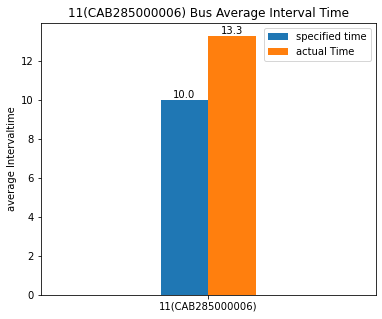

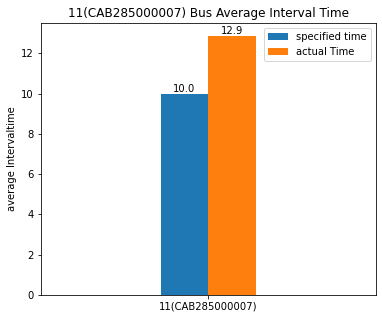

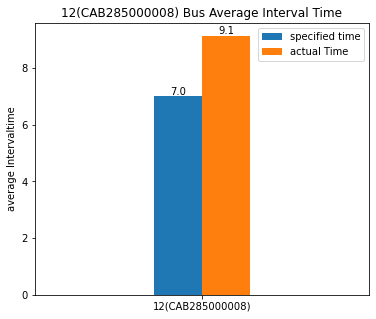

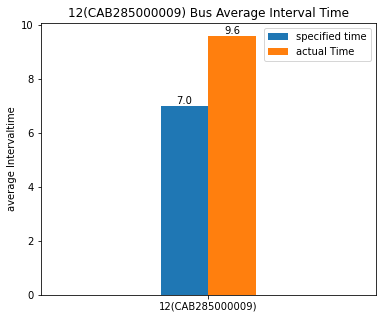

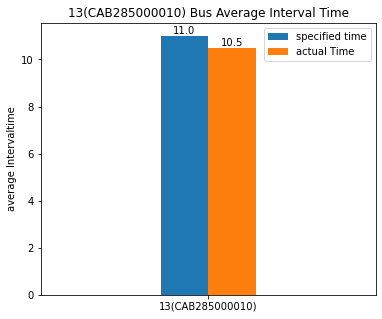

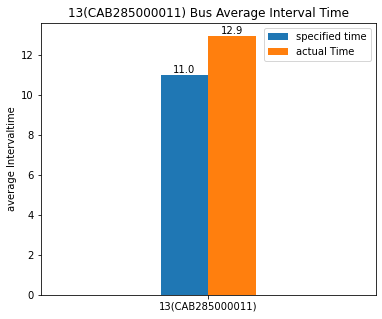

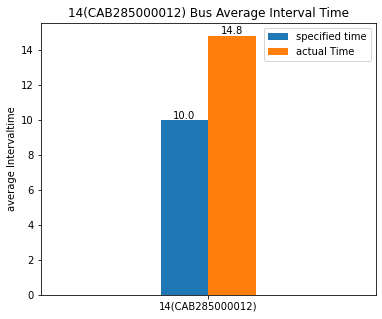

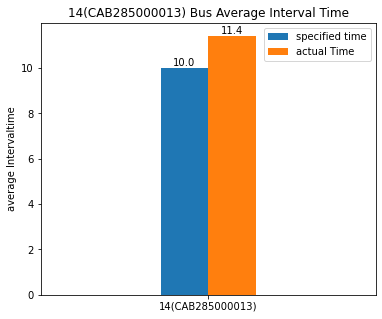

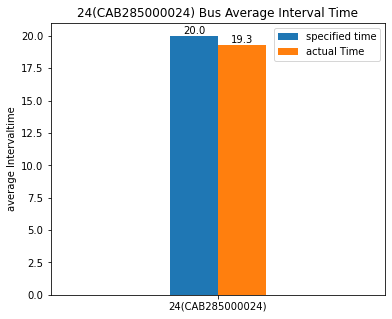

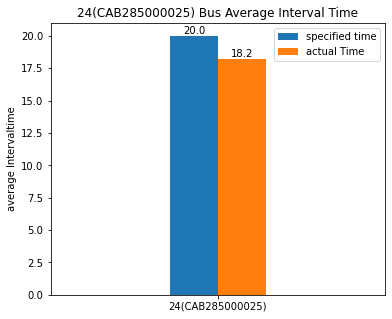

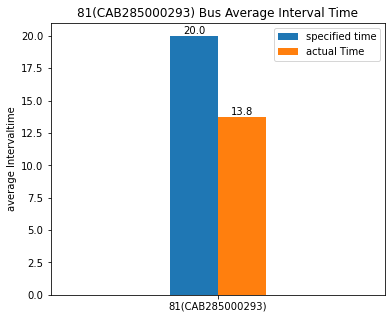

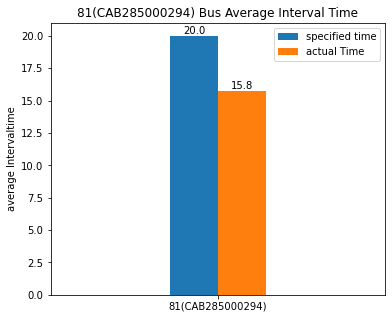

In [13]:
# route
for route in time_gap_df.index:
    #print(route)
    s = time_gap_df.loc[[route],:]
    ax = s.plot(kind="bar", title = route+" Bus Average Interval Time",width=0.2, figsize=(6,5))
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')

    plt.ylabel("average Intervaltime")
    plt.xticks(rotation=0)

    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.savefig('../image/Compare_interval_times_for_'+route+'.png',dpi=100,transparent=True,bbox_inches='tight')
    

## analysis interval impact stage

In [14]:
interval_times

0     10
1     10
2      7
3      7
4     11
5     11
6     10
7     10
8     20
9     20
10    20
11    20
Name: intervaltime, dtype: int64

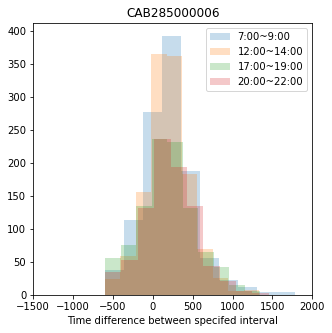

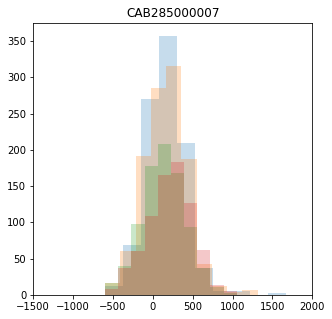

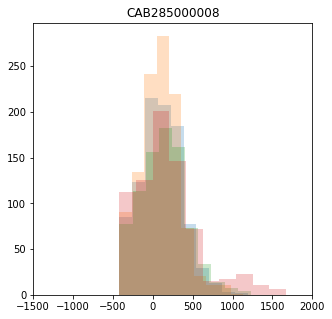

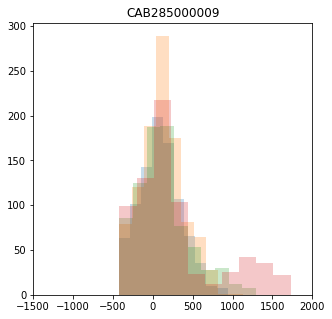

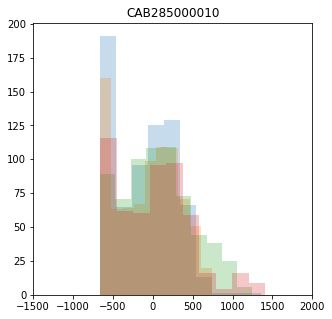

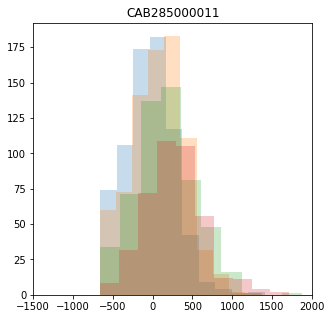

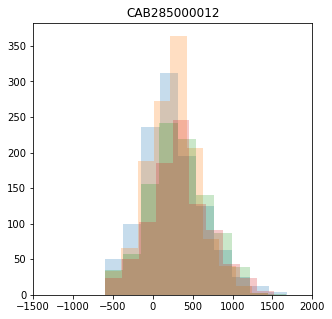

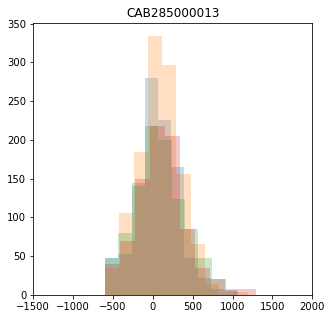

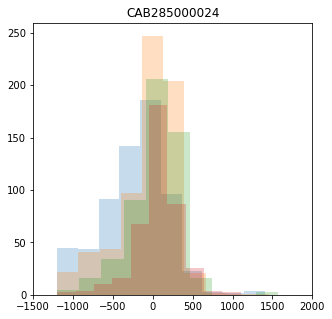

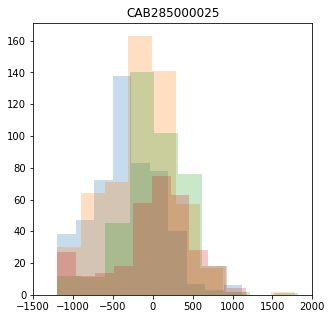

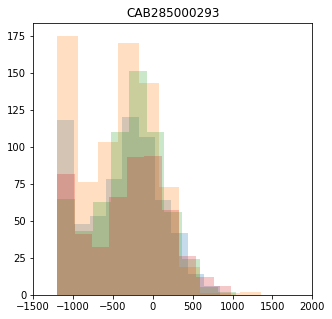

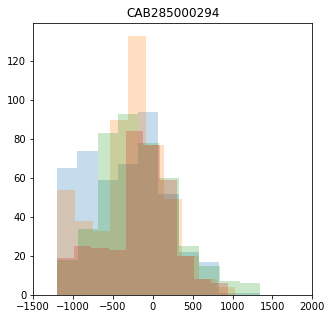

In [15]:
route_info = pd.read_csv('../csv/route_info.csv')
bus_timegap_file_list = os.listdir('../mine')

interval_times = route_info['intervaltime']
for i, file in enumerate(bus_timegap_file_list):
    bus = pd.read_csv('../mine/' + file)
    bus_intervaltime = interval_times[i] # 현재 버스의 배차 간격 추출
    
    bus_interval_comp = list()
    
    for stage in range(4):
        time_gap_str = bus.iloc[stage, 1] # time gap 추출
        time_gap = list(map(int, time_gap_str[1:-1].split(', '))) # str -> int 형 리스트로 변환
        
        for gap in range(len(time_gap)):
            time_gap[gap] -= bus_intervaltime*60
        
        bus_interval_comp.append(time_gap)
       
    plt.subplots(figsize=(5, 5))
    
    plt.hist(bus_interval_comp[0], alpha=0.25)
    plt.hist(bus_interval_comp[1], alpha=0.25)
    plt.hist(bus_interval_comp[2], alpha=0.25)
    plt.hist(bus_interval_comp[3], alpha=0.25)
    
    plt.xticks(np.arange(-1500, 2500, 500))
    
    plt.title(file[:-4])
    
    if i == 0:
        plt.xlabel('Time difference between specifed interval')
        plt.legend(['7:00~9:00', '12:00~14:00', '17:00~19:00', '20:00~22:00']) # 첫번째 그래프에 어느 것이 malignant인지, benign인지 표시
    
    plt.savefig('../image/analysis_interval_impact_'+file[:-4]+'.png') # 그래프 이미지로 저장
